In [1]:
import sys
sys.path.append("../../")

In [2]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence, whereSmallerOrEqual
from delay.value import calculateValue
import pandas as pd

In [13]:
simulation = Simulation(FunctionType.HARD_INTERVAL, (2, 0), calculateValue, calc.linear(N=6, w=1))
simulation.setN(6)
simulation.setConv(0)
simulation.setDuration(1000000) # 10^8
simulation.setD(0)

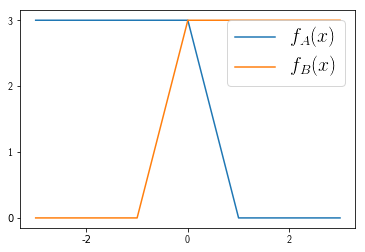

In [4]:
N = 6
showIntervalFunctions(fA_HardInterval, fB_HardInterval, N, d=0)

[1, 2, 1, 0, -1, 0, -1, 0, -1, 0, 1, 0, -1, -2, -1, 0, -1, 0, 1, 0, -1, -2, -1, 0, -1, 0, 1, 2, 3, 2, 1, 0, -1, 0, -1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, -1, -2, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, 1, 0, 1, 0, 1, 0, -1, 0, -1, 0, 1, 2, 3, 2, 1, 0, -1, -2, -1, 0, -1, 0, 1, 0, 1, 0, 1, 0, -1, -2, -1, 0, 1, 2, 1, 0, -1, -2]


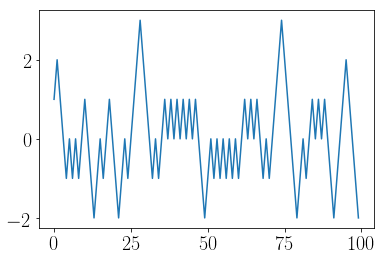

In [14]:
simulation.run()
seq = simulation.x[2:]
print(seq[:100])
plt.plot(seq[:100]);

In [6]:
def find(seq, pattern):
    res = 0
    for i in range(len(seq) - len(pattern) - 1):
        match = True
        for j in range(len(pattern)):
            if seq[i+j] != pattern[j]:
                match = False
        if match:
            res += 1
    return res

In [39]:
a = find(seq, [, -1, 0])
b = find(seq, [-2, -1, 0])/2 + find(seq, [0, 1, 0])/4 + find(seq, [2, 1, 0])/2 + find(seq, [-2, -1, 0])/2
print(a, b)

print(abs(a-b)/b < 0.03)

157668 157789.25
True


In [38]:
a = find(seq, [0, -1, 0])
b = find(seq, [-2, -1, 0])*5/2

print(abs(a-b)/b < 0.03)

False


In [29]:
a = find(seq, [0, 1, 2])
b = find(seq, [-2, -1, 0])/4 + find(seq, [0, -1, 0])/4

print(a, b)
print(abs(a-b)/b < 0.03)

52620 52545.75
True


In [31]:
find(seq, [-2, -1, 0, 1])

26300